<img src="images/thro.png" align="right"> 
# A2I2 - Artificial Neural Networks (ANN)

## <span style="color:red">Lecture - Part 2 - Exercise</span>

---
## Step 2: Data Understanding and Data Preparation

### <span style="color:blue">Business Problem: </span> Optimize wine revenue

Wine can have different quality - better wines are more expensive than average or below average wines. 

### <span style="color:blue">Understanding the business</span>

**Wine Making**
* Wine is made from grapes.
* Price of the wine depends on the **expected** quality about 5 to 10 years after production.
* Two options: 
    * keep wine until the quality is known and sell for "correct" price -> lots of storage needed
    * estimate quality and sell immediately  
* Many chemical attributes of the (newly made) wine can be measured easily (e.g. acidity, sugar, pH, ...)

### <span style="color:blue">Mapping to Data Science Problems and Methods</span>

* Predict wine quality based on measured attributes (classification)


### <span style="color:blue">Understanding the data</span>

We will be using the Wine Quality Dataset from *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.*

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Attribute Information:
<pre>
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality (score between 0 and 10)
</pre>

We will be using the data for the white wines.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wine_raw = pd.read_csv('data/winequality-white.csv', delimiter=';')
wine_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
wine_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [5]:
wine_raw.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

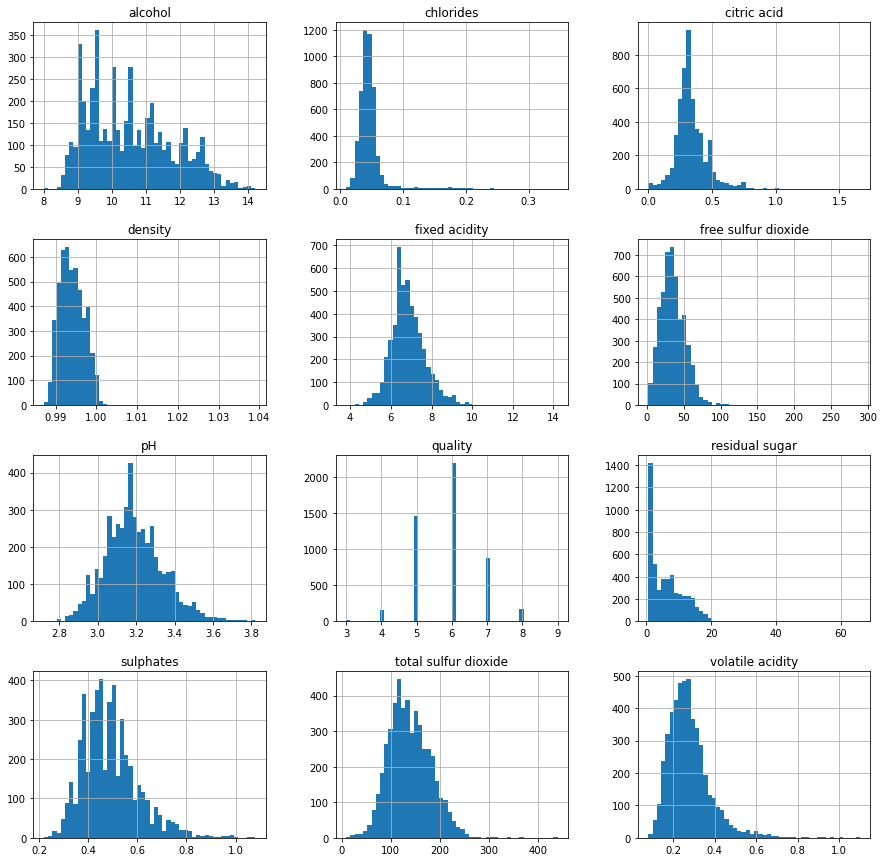

In [6]:
_ = wine_raw.hist(bins=50, figsize=(15,15))

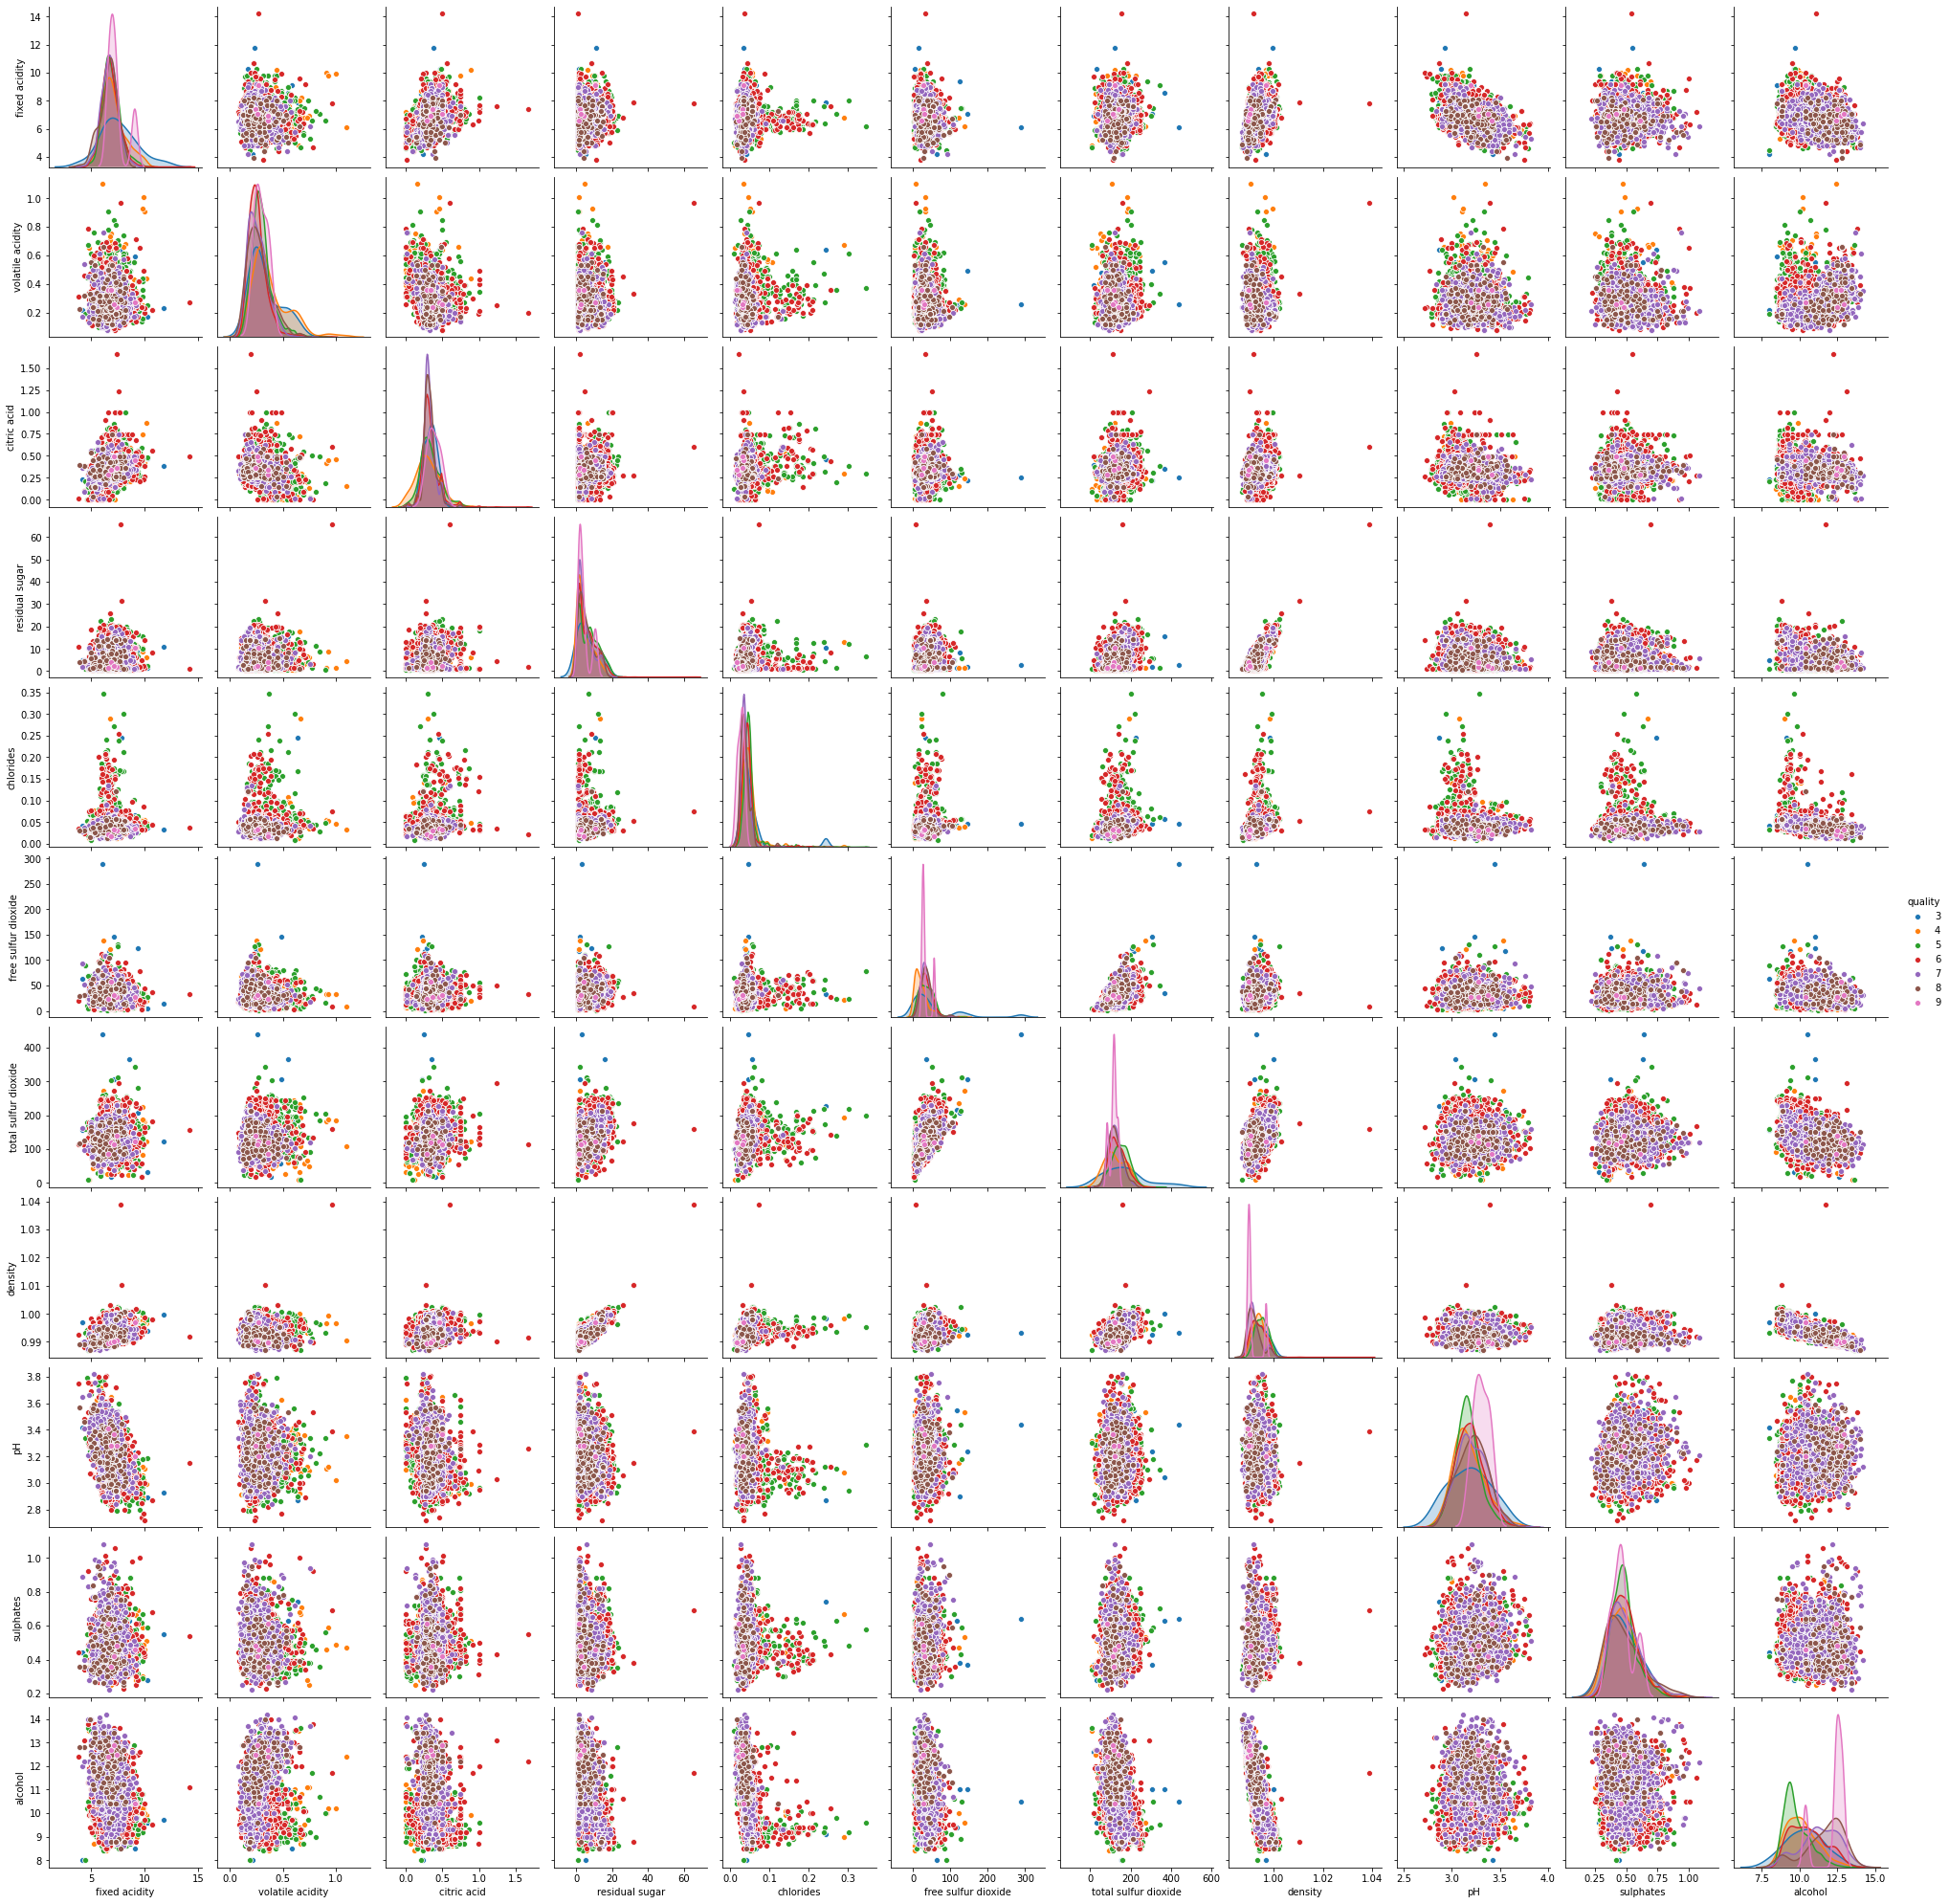

In [7]:
_=sns.pairplot(wine_raw, hue='quality')

### <span style="color:blue">Data Preparation</span>

In [1]:
# check how many cells are nan/null

### outlier-removal as done in the lecture

In [2]:
# a common defition of outliers is: 
# all values more than 3 times the standard deviation from the mean
# check for the "outlier condition":

In [3]:
# the 3x definition removes many wines - let's increase this to 5x as we do not want to loose so many!

In [25]:
# --- EOF ---